In [1]:
import sys

In [2]:
sys.path.append('../../source/')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
sns.set_style(style='darkgrid')

Exploratory Data Analysis

In [7]:
from Hedge import Hedge

Initialize an Hedge instance within which stock data are stored.

In [8]:
hedge = Hedge('../../data/all_stocks.csv','../../data/spy.csv', begindate='2014-01-01', enddate='2014-12-31')

In [9]:
hedge.portfolio = ['FLIR', 'IVC', 'KNDI', 'MHO', 'EVC', 'PCO', 'COWN', 'NILE', 'MIW',
       'ANAC', 'ADHD', 'PLBC', 'ESXB', 'JRO', 'WES', 'HURC', 'MQT', 'EROS',
       'RPAI', 'HMNF']
hedge.market = ['GPX', 'GRMN', 'MPWR', 'ENR', 'CTHR', 'PRFZ', 'SUMR', 'CUBE',
       'ACTS', 'ANF', 'MYI', 'SON', 'SSL', 'PW', 'KT', 'TWN', 'IPWR',
       'AAN', 'CASH', 'DISCA', 'RFP', 'HPS', 'WMB', 'VRSN', 'ETN', 'WPZ',
       'RAI', 'BOXC', 'ARCI', 'EMN', 'LMOS', 'EXPD', 'NQS', 'GB', 'KNOP',
       'CNL', 'ENDP', 'SPSC', 'SCVL', 'EPAY']

Plotting the market data - or SPY (SPDR S&P 500 ETF Trust)

In [10]:
import pandas as pd

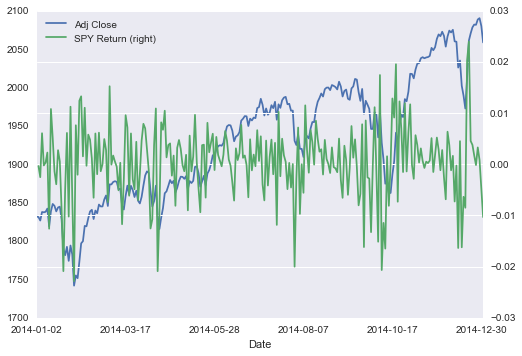

In [12]:
spydf = pd.DataFrame(hedge.spy.copy())
spydf.rename(columns={'Adj Close': 'SPY'})
spydf['SPY Return'] = spydf.pct_change()
spydf.plot(secondary_y='SPY Return')
plt.xlabel('Date')
plt.savefig('./Figures/0404/SPY.png')

Plot portfolio data.

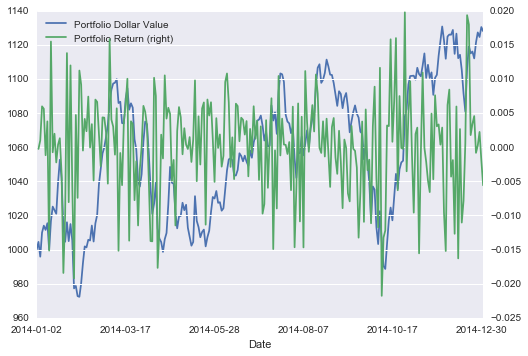

In [13]:
portdf = pd.DataFrame([hedge.dollar_portfolio_sum, hedge.dollar_market_sum_ret]).transpose()
portdf.columns = ['Portfolio Dollar Value', 'Portfolio Return']
portdf.plot(secondary_y='Portfolio Return')
plt.xlabel('Date')
plt.savefig('./Figures/0404/Port.png')

Plot Initial Market

In [14]:
hedge.market = ['GPX', 'GRMN', 'MPWR', 'ENR', 'CTHR', 'PRFZ', 'SUMR', 'CUBE',
       'ACTS', 'ANF', 'MYI', 'SON', 'SSL', 'PW', 'KT', 'TWN', 'IPWR',
       'AAN', 'CASH', 'DISCA', 'RFP', 'HPS', 'WMB', 'VRSN', 'ETN', 'WPZ',
       'RAI', 'BOXC', 'ARCI', 'EMN', 'LMOS', 'EXPD', 'NQS', 'GB', 'KNOP',
       'CNL', 'ENDP', 'SPSC', 'SCVL', 'EPAY']

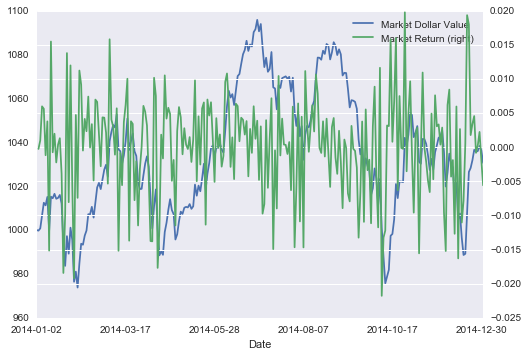

In [15]:
marketdf = pd.DataFrame([hedge.dollar_market_sum, hedge.dollar_market_sum_ret]).transpose()
marketdf.columns = ['Market Dollar Value', 'Market Return']
marketdf.plot(secondary_y='Market Return')
plt.xlabel('Date')
plt.savefig('./Figures/0404/Initial_market.png')

---
Simulated annealing

In [16]:
import Simulation
from energy_functions import *

In [17]:
from BetaUtils import get_beta, beta_hedging_ret, cum_ret

In [64]:
hedge.market = ['GPX', 'GRMN', 'MPWR', 'ENR', 'CTHR', 'PRFZ', 'SUMR', 'CUBE',
       'ACTS', 'ANF', 'MYI', 'SON', 'SSL', 'PW', 'KT', 'TWN', 'IPWR',
       'AAN', 'CASH', 'DISCA', 'RFP', 'HPS', 'WMB', 'VRSN', 'ETN', 'WPZ',
       'RAI', 'BOXC', 'ARCI', 'EMN', 'LMOS', 'EXPD', 'NQS', 'GB', 'KNOP',
       'CNL', 'ENDP', 'SPSC', 'SCVL', 'EPAY']

st_sharpe, bm_sharpe = Simulation.simulated_annealing(hedge, 
                                                      init_temp=0.01, 
                                                      min_temp=0.001, 
                                                      cool_by=0.9, 
                                                      reanneal=10, 
                                                      num_iter=300, 
                                                      energy_func=neg_sharpe)

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290


In [65]:
st_sharpe_300, bm_sharpe_300 = st_sharpe, bm_sharpe

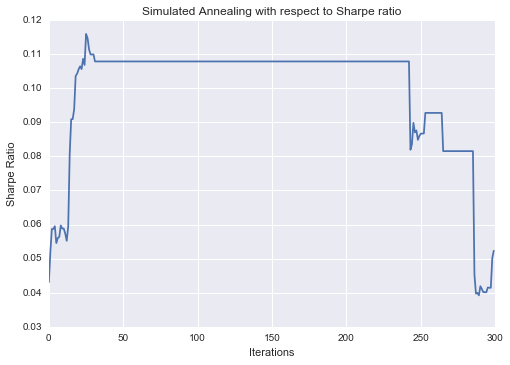

In [66]:
plt.plot(-st_sharpe)
plt.xlabel('Iterations')
plt.ylabel('Sharpe Ratio')
plt.title('Simulated Annealing with respect to Sharpe ratio')
plt.savefig('./Figures/0404/Sharpe_sim.png')

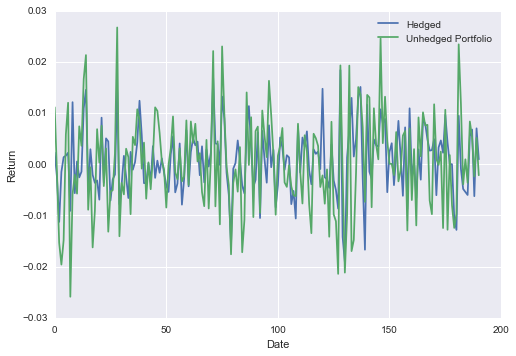

In [67]:
hedge.market = bm_sharpe

_, betas = get_beta(hedge.dollar_portfolio_sum_ret, hedge.dollar_market_sum_ret)
bhr = beta_hedging_ret(betas[1:], hedge.dollar_portfolio_sum_ret[61:], hedge.dollar_market_sum_ret[61:])

_, betas_sp = get_beta(hedge.dollar_portfolio_sum_ret, hedge.spy.pct_change())
bhr_sp = beta_hedging_ret(betas[1:], hedge.dollar_portfolio_sum_ret[61:], hedge.spy.pct_change()[61:])

plt.plot(bhr, label = 'Hedged')
plt.plot(hedge.dollar_portfolio_sum_ret[61:].values, label = 'Unhedged Portfolio')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.savefig('./Figures/0404/Sharpe_Ret.png')

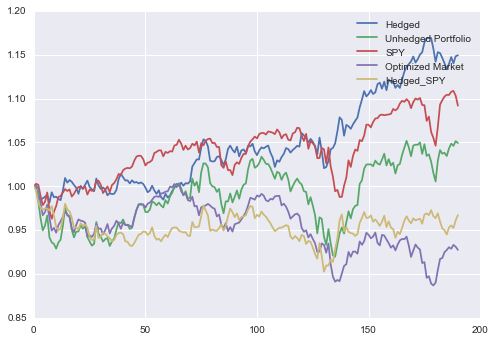

In [68]:
plt.plot(cum_ret(bhr), label = 'Hedged')
plt.plot(cum_ret(hedge.dollar_portfolio_sum_ret[61:].values), label = 'Unhedged Portfolio')
plt.plot(cum_ret(hedge.spy.pct_change()[61:].values), label = 'SPY')
plt.plot(cum_ret(hedge.dollar_market_sum_ret[61:].values), label = 'Optimized Market')
plt.plot(cum_ret(bhr_sp), label = 'Hedged_SPY')
plt.legend()
plt.savefig('./Figures/0404/Sharpe_cum_ret.png')

In [69]:
print 'Hedged Sharpe:', -neg_sharpe((bhr))
print 'Hedged against SPY Sharpe:', -neg_sharpe(bhr_sp)
print 'Unhedged Sharpe:', -neg_sharpe(hedge.dollar_portfolio_sum_ret[61:])
print
print 'Hedged Correlation:', correlation(bhr, hedge.spy.pct_change()[61:].values)
print 'Hedged against SPY Correlation:', correlation(bhr_sp, hedge.spy.pct_change()[61:].values)
print 'Unhedged Correlation:', correlation(hedge.dollar_portfolio_sum_ret[61:], hedge.spy.pct_change()[61:].values)
print 
print 'Hedged Volatility:', volatility(bhr)
print 'Hedged against SPY Volatility:', volatility(bhr_sp)
print 'Unhedged Volatility:', volatility(hedge.dollar_portfolio_sum_ret[61:])
print 
print 'Hedged Returns:', cum_ret(bhr)[-1]
print 'Hedged against SPY Returns:', cum_ret(bhr_sp)[-1]
print 'Unhedged Returns:', cum_ret(hedge.dollar_market_sum_ret[61:])[-1]

Hedged Sharpe: 0.117415969462
Hedged against SPY Sharpe: -0.0187719660767
Unhedged Sharpe: 0.0373867130098

Hedged Correlation: 0.0619530688975
Hedged against SPY Correlation: 0.130516335798
Unhedged Correlation: 0.675100399432

Hedged Volatility: 0.00649317534545
Hedged against SPY Volatility: 0.00706013449426
Unhedged Volatility: 0.00950000866407

Hedged Returns: 1.1493970534
Hedged against SPY Returns: 0.967179122097
Unhedged Returns: 0.927490267551


In [70]:
sharpe_market_hedged = -neg_sharpe((bhr))
sharpe_spy_hedged = -neg_sharpe(bhr_sp)
sharpe_unhedged = -neg_sharpe(hedge.dollar_portfolio_sum_ret[61:])

correlation_market_hedged = correlation(bhr, hedge.spy.pct_change()[61:].values)
correlation_spy_hedged = correlation(bhr_sp, hedge.spy.pct_change()[61:].values)
correlation_unhedged = correlation(hedge.dollar_portfolio_sum_ret[61:], hedge.spy.pct_change()[61:].values)

volatility_market_hedged = volatility(bhr)
volatility_spy_hedged = volatility(bhr_sp)
volatility_unhedged = volatility(hedge.dollar_portfolio_sum_ret[61:])

returns_market_hedged = cum_ret(bhr)[-1]
returns_spy_hedged = cum_ret(bhr_sp)[-1]
returns_unhedged = cum_ret(hedge.dollar_market_sum_ret[61:])[-1]

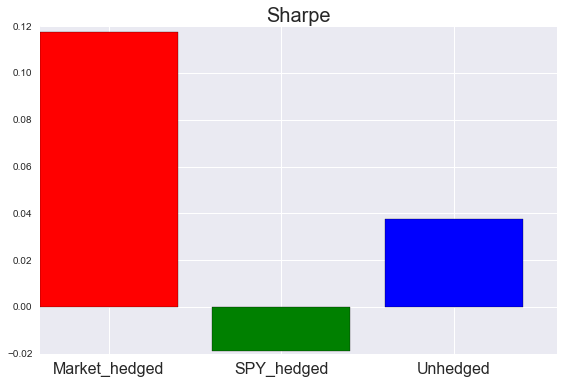

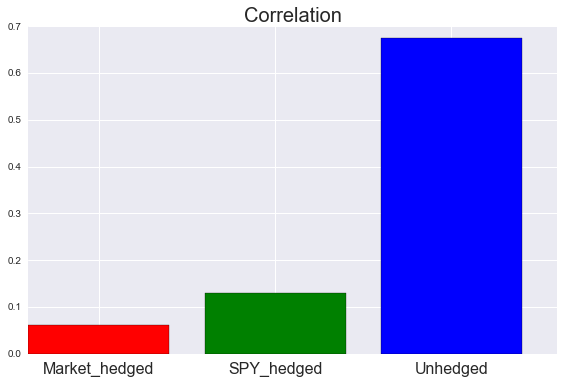

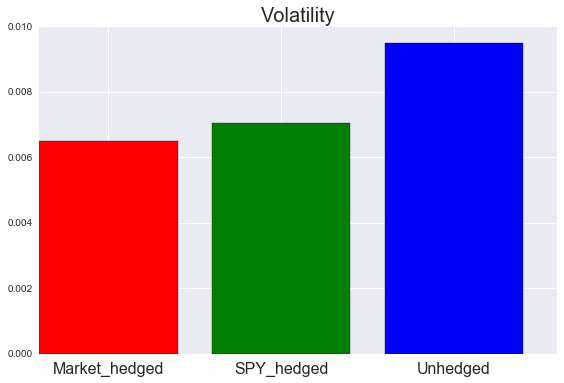

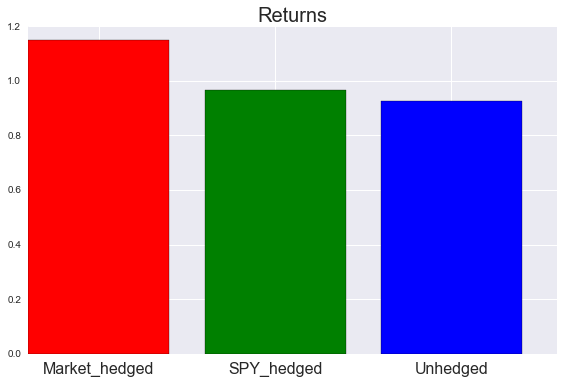

In [85]:
for metric in ['sharpe','correlation','volatility','returns']:
    market_hedged = locals()[metric+'_market_hedged']
    spy_hedged = locals()[metric+'_spy_hedged']
    unhedged = locals()[metric+'_unhedged']
    plt.bar([0,1,2],[market_hedged, spy_hedged, unhedged], color=['r','g','b'])
    plt.xticks(np.array([0,1,2]) + 0.4, ('Market_hedged', 'SPY_hedged', 'Unhedged'), fontsize = 16)

    plt.title(metric.capitalize(), fontsize=20)
    plt.tight_layout()
    plt.show()

In [87]:
hedge = Hedge('../../data/all_stocks.csv','../../data/spy.csv', begindate='2008-01-01', enddate='2009-12-31')
hedge.generateRandomMarket(40)
hedge.generateRandomPort()

array(['IPCC', 'E', 'REIS', 'AIRI', 'LMNR', 'CNOB', 'AEY', 'DTLK', 'GDV',
       'FLL', 'GLOW', 'OCFC', 'CETV', 'PSA', 'SEAC', 'KVHI', 'FLL', 'TTWO',
       'JLL', 'GTLS', 'ISSC', 'CTBI', 'MFM', 'CHW', 'SGA', 'STBA', 'MMU',
       'OBAS', 'MUJ', 'EWBC', 'TGT', 'PRGO', 'SLB', 'UN', 'PKD', 'TYL',
       'BME', 'NUVA', 'OXGN', 'EA'], dtype=object)

array(['PFSW', 'MOC', 'UBOH', 'SMSI', 'LCUT', 'RPT', 'CCE', 'LPL', 'KELYA',
       'BPL', 'ITIC', 'GRA', 'CSX', 'BK', 'NNBR', 'TGH', 'MBI', 'SE', 'DW',
       'TUES'], dtype=object)